# The Most Important Models of Your Data Science Career

TODO: Talk about the value prop of this lecture, how this will talk about when to use what, overview of the three models covered

TODO: Talk about interpretability vs. predictive power

## Linear Models: Linear Regression and Logistic Regression

TODO: Talk about -
- What they are
- How they work
- How quick they are to run
    - Why they should always be used as a baseline model
- Interpretability
- Cons:
    - A lot of assumptions
    - Not robust to outliers
    - Require linear assumption
    - Show anscombe's quartet
    
```{python}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset('anscombe')

# Showing same mean/sd/percentiles for the predictor
df.groupby('dataset')['x'].describe()

# Show the results of a linear regression within each dataset
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=df,
           col_wrap=2, ci=None, palette='muted', height=4,
           scatter_kws={'s': 50, 'alpha': 1})
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

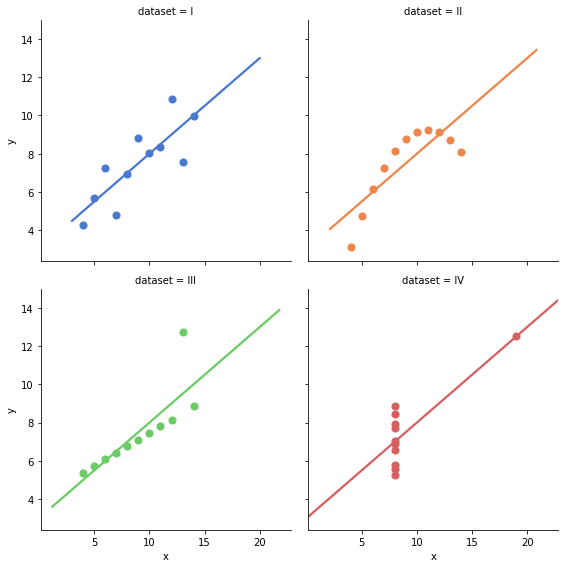

In [4]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [9]:
df.groupby('dataset')['x'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
I,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
II,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
III,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
IV,11.0,9.0,3.316625,8.0,8.0,8.0,8.0,19.0
